<hr>
<h1>Activity 2: UK ROAD ACCIDENT DATA ANALYTICS </h1>
<hr>
<h3>Analyst : Nerjie Angelo Mecantina</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

<h2>Converting Dataset(s) into Dataframe</h2>

<h3>Requirements</h3>
<ul>
    <li>Name of the Dataframes</li>
    <li>Filepath</li>
</ul>

In [2]:
accidents = pd.read_csv('datasets\\uk_road_accident.csv')

In [3]:
accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accidents.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [5]:
accidents.columns = ['Index', 'Accident_Severity', 'Accident_Date', 'Latitude',
       'Light_Conditions', 'District_Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type']

<h2>Descriptive Analysis</h2>

In [6]:
accidents.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [7]:
accidents.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


<h2>Checking Null Values</h2>

In [8]:
accidents.isnull()

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h2>Filtering a column</h2>

In [10]:
accidents['Accident_Severity']

0         Serious
1         Serious
2         Serious
3         Serious
4          Slight
           ...   
660674     Slight
660675     Slight
660676     Slight
660677    Serious
660678    Serious
Name: Accident_Severity, Length: 660679, dtype: object

In [11]:
accidents['Accident_Severity'].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

In [12]:
accidents[accidents['Accident_Severity'] == 'Slight']

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
8,200701BS67515,Slight,31-10-2019,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
9,200701BS67543,Slight,18-10-2019,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc
13,200701BS67853,Slight,8/11/2019,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Wet or damp,Single carriageway,Urban,Other,Car
14,200701BS67859,Slight,1/11/2019,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Dry,One way street,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,29-01-2022,57.572162,Daylight,Highland,-3.930799,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under
660673,201091NM01190,Slight,2/2/2022,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car


In [13]:
accidents[accidents['Accident_Severity'] != 'Slight']

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,200701BS67159,Serious,18-09-2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,11/2/2022,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car
660645,201091NL05842,Serious,18-10-2022,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car
660672,201091NM01085,Serious,29-01-2022,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [14]:
slight_df = accidents[accidents['Accident_Severity'] == 'Slight']
slight_df

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
8,200701BS67515,Slight,31-10-2019,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
9,200701BS67543,Slight,18-10-2019,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc
13,200701BS67853,Slight,8/11/2019,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Wet or damp,Single carriageway,Urban,Other,Car
14,200701BS67859,Slight,1/11/2019,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Dry,One way street,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,29-01-2022,57.572162,Daylight,Highland,-3.930799,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under
660673,201091NM01190,Slight,2/2/2022,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car


In [15]:
serious_df =accidents[accidents['Accident_Severity'] == 'Serious']
serious_df

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,200701BS67159,Serious,18-09-2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,11/2/2022,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car
660645,201091NL05842,Serious,18-10-2022,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car
660672,201091NM01085,Serious,29-01-2022,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [16]:
fatal_df = accidents[accidents['Accident_Severity'] == 'Fatal']
fatal_df

,Index,Accident_Severity,Accident_Date,Latitude,Light_Conditions,District_Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
7,200701BS67370,Fatal,3/10/2019,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car
11,200701BS67747,Fatal,2/11/2019,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
20,200701BS68301,Fatal,24-10-2019,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car
21,200701BS68302,Fatal,24-11-2019,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car
717,200701CP00032,Fatal,30-01-2019,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,29-01-2022,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car
660519,201091NJ01533,Fatal,2/2/2022,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car
660565,201091NJ11329,Fatal,15-08-2022,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over
660581,201091NJ14695,Fatal,21-10-2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car


<h2>FILLING UP NULL VALUES WITH STATISTICALLY ACCEPTED VALUES</h2>

In [17]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident_Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District_Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

In [18]:
accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident_Date                  0
Latitude                      25
Light_Conditions               0
District_Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [19]:
accidents['Latitude'] = accidents['Latitude'].fillna(accidents['Latitude'].mean())
accidents['Longitude'] = accidents['Longitude'].fillna(accidents['Longitude'].mean())
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].fillna(accidents['Road_Surface_Conditions'].mode()[0])
accidents['Road_Type'] = accidents['Road_Type'].fillna(accidents['Road_Type'].mode()[0])
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].fillna(accidents['Urban_or_Rural_Area'].mode()[0])
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].fillna(accidents['Weather_Conditions'].mode()[0])
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District_Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<h2>Changing the Data Type</h2>

In [20]:
accidents['Index'] = accidents['Index'].astype('category')
accidents['Accident_Severity'] = accidents['Accident_Severity'].astype('category')
accidents['Accident_Date'] = accidents['Accident_Date'].astype('category')
accidents['Light_Conditions'] = accidents['Light_Conditions'].astype('category')
accidents['District_Area'] = accidents['District_Area'].astype('category')
accidents['Road_Surface_Conditions'] = accidents['Road_Surface_Conditions'].astype('category')
accidents['Road_Type'] = accidents['Road_Type'].astype('category')
accidents['Urban_or_Rural_Area'] = accidents['Urban_or_Rural_Area'].astype('category')
accidents['Weather_Conditions'] = accidents['Weather_Conditions'].astype('category')
accidents['Vehicle_Type'] = accidents['Vehicle_Type'].astype('category')
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Index                    660679 non-null  category
 1   Accident_Severity        660679 non-null  category
 2   Accident_Date            660679 non-null  category
 3   Latitude                 660679 non-null  float64 
 4   Light_Conditions         660679 non-null  category
 5   District_Area            660679 non-null  category
 6   Longitude                660679 non-null  float64 
 7   Number_of_Casualties     660679 non-null  int64   
 8   Number_of_Vehicles       660679 non-null  int64   
 9   Road_Surface_Conditions  660679 non-null  category
 10  Road_Type                660679 non-null  category
 11  Urban_or_Rural_Area      660679 non-null  category
 12  Weather_Conditions       660679 non-null  category
 13  Vehicle_Type             660679 non-null  ca

<h1>Clearing any Inconsistencies with the Data Sets</h1>

In [21]:
accidents['Accident_Date'] = accidents['Accident_Date'].str.strip()

accidents['Accident_Date'] = accidents['Accident_Date'].astype('str')

accidents['Accident_Date'] = accidents['Accident_Date'].str.replace('/', '-')

accidents['Accident_Date'] = pd.to_datetime(accidents['Accident_Date'], dayfirst = True, errors = 'coerce')

<h1>Adjusting Data Types</h1>

In [22]:
accidents.dtypes

Index                            category
Accident_Severity                category
Accident_Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District_Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions               category
Vehicle_Type                     category
dtype: object

<h1>Extracting date information usinig pandas date time</h1>

In [23]:
accidents['Year'] = accidents['Accident_Date'].dt.year
accidents['Month'] = accidents['Accident_Date'].dt.month
accidents['Day'] = accidents['Accident_Date'].dt.day
accidents['DayOfWeek'] = accidents['Accident_Date'].dt.dayofweek

In [24]:
accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident_Date              0
Latitude                   0
Light_Conditions           0
District_Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<h1>Exploratory Data Analytics</h1>
<hr>

<h2>Accidents happened in urban vs rural areas</h1>

In [25]:
accidents['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

<h2>Insight 1:</h2>
<p>Based on the results, urban areas recorded 421,678 accidents while rural areas had 238,990 accidents.</p>
<hr>

<h2>Common vehicle type in accidents</h2>

In [26]:
accidents['Vehicle_Type'].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

<h2>Insight 2:</h2>
<p>Based on the results, the most common vehicle involved in accidents is cars, with a total of 497,992 cases</p>
<hr>

<h2>Average number of vehicles involved by road type</h2>

In [27]:
accidents.groupby('Road_Type')['Number_of_Vehicles'].mean()

Road_Type
Dual carriageway      2.009766
One way street        1.585441
Roundabout            1.901323
Single carriageway    1.794803
Slip road             1.917483
Name: Number_of_Vehicles, dtype: float64

<h2>Insight 3:</h2>
<p>Based on the results, major roads and highways tend to involve more vehicles on average compared to smaller roads.</p>
<hr>

<h3>Accidents happened under each light condition</h3>

In [28]:
accidents['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h2>Insight 4:</h2>
<p>Based on the results, most accidents occurred during daylight while fewer accidents happened under poor lighting or darkness</p>
<hr>

<h2>Average number of casualties per accident severity level</h2>

In [29]:
accidents.groupby('Accident_Severity')['Number_of_Casualties'].mean()

Accident_Severity
Fatal      1.903129
Serious    1.467280
Slight     1.331402
Name: Number_of_Casualties, dtype: float64

<h2>Insight 5:</h2>
<p>Based on the results, accidents with higher severity levels result in a greater number of casualties.</p>
<hr>

<h2>Correlation between the number of vehicles and the number of casualties</h2>

In [30]:
vehicles_casualties = (accidents['Number_of_Vehicles'].corr(accidents['Number_of_Casualties']))
vehicles_casualties

np.float64(0.22888886126927557)

<h2>Insight 6:</h2>
<p>The results show a weak positive relationship, meaning more vehicles can lead to slightly more casualties</p>
<hr>

<h2>Which Accident Severity has the highest average number of casualties?</h2>

In [31]:
slight_df['Number_of_Casualties'].mean()

np.float64(1.3314023919787301)

In [32]:
serious_df['Number_of_Casualties'].mean()

np.float64(1.46727954929322)

In [33]:
fatal_df['Number_of_Casualties'].mean()

np.float64(1.9031289689412307)

<h2>Insight 7:</h2>
<p>The resutls show that fatal accidents have the highest average casualties, followed by serious and slight accidents.</p>
<hr>

<h2>Question 8:</h2>
<h3>Which severity level involves the highest average number of vehicles?</h3>

In [34]:
slight_df['Number_of_Vehicles'].mean()

np.float64(1.8558640371336694)

In [35]:
serious_df['Number_of_Vehicles'].mean()

np.float64(1.6783273065282203)

In [36]:
fatal_df['Number_of_Vehicles'].mean()

np.float64(1.7869760997575337)

<h2>Insight 8: </h2>
<p> The results show that serious accidents tend to involve slightly more vehicles compared to slight or fatal ones.</p>
<hr>

<h2>Which weather condition has the highest total number of accidents?</h2>

In [37]:
accidents['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h2>Insight 9:</h2>
<p>The results show that the most common weather condition highlights typical driving environments for accidents.</p>
<hr>

<h2>Accidents happened in each month?</h2>

In [38]:
accidents.groupby('Month')['Index'].count()

Month
1     52872
2     49491
3     54086
4     51744
5     56352
6     56481
7     57445
8     53913
9     56455
10    59580
11    60424
12    51836
Name: Index, dtype: int64

<h2>Insight 10:</h2>
<p>In the results months like August or July may show higher accidents due to summer travel, while winter months like February have fewer due to less road activity.</p>
<hr>

<h2>Average number of vehicles in fatal accidents by road type</h2>

In [39]:
fatal_df.groupby('Road_Type')['Number_of_Vehicles'].mean()

Road_Type
Dual carriageway      1.932231
One way street        1.357895
Roundabout            1.549296
Single carriageway    1.761759
Slip road             1.571429
Name: Number_of_Vehicles, dtype: float64

<h2>Insight 11:</h2>
<p>The results show that dual carriageways in fatal accidents average more vehicles than single carriageways , likely due to higher speeds and traffic density.</p>
<hr>

<h2>Accidents involved buses or coaches</h2>

In [40]:
accidents[accidents['Vehicle_Type'] == 'Bus or coach (17 or more pass seats)']['Index'].count()

np.int64(25878)

<h2>Insight 12:</h2>
<p>In the results buses/coaches are involved in 25,879 accidents, a small but significant portion due to their capacity for multiple casualties.</p>
<hr>

<h2>Number of casualties in accidents during darkness</h2>

In [41]:
accidents[accidents['Light_Conditions'] != 'Daylight']['Number_of_Casualties'].sum()

np.int64(246679)

<h2>Insight 13: </h2>
<p>In the results darkness related accidents contribute 246,679 casualties, emphasizing the need for better lighting or driver caution at night.</p>
<hr>

<h2>Number of accidents per year</h2>

In [42]:
accidents.groupby('Year')['Index'].count()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: Index, dtype: int64

<h2>Insight 14:</h2>
<p>The Results show that accidents likely peaked around 2019, with potential dips in 2020-2022 due to reduced travel during COVID-19 restrictions</p>
<hr>

<h2>Number of casualties in urban vs. rural areas</h2>

In [43]:
accidents.groupby('Urban_or_Rural_Area')['Number_of_Casualties'].sum()

Urban_or_Rural_Area
Rural          353515
Unallocated        13
Urban          543040
Name: Number_of_Casualties, dtype: int64

<h2>Insight 15:</h2>
<p>The results show that urban areas have more total casualties than rural due to higher accident frequency, despite rural crashes often being more severe.</p>
<hr

<h2>Question 16:</h2>
<h3>What is the total number of accidents by vehicle type and accident severity?</h3>

In [49]:
df = accidents.groupby(['Vehicle_Type', 'Accident_Severity']).size()
df.unstack()

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


<h2>Insight 16:</h2>
<p>It shows that cars dominate across all severities accidents, but motorcycles show a higher proportion in serious and fatal cases, aligning with stats where motorcyclists account for 19% of fatalities.</p>
<hr> 

<h2>Number of accidents by year and accident severity</h2>

In [50]:
df = accidents.groupby(['Year', 'Accident_Severity'])['Index'].count()
df.unstack()

Accident_Severity,Fatal,Serious,Slight
Year,,,
2019,2714,24322,155079
2020,2341,23121,145129
2021,2057,21997,139500
2022,1549,18777,124093


<h2>Insight 17:</h2>
<p>It shows that in 2022 slight accidents were 124,093, serious 18,777, and fatal 1,549, showing a potential decline in fatals compared to 2019, possibly from safety improvements.</p>
<hr>

<h2>What is the average number of vehicles in accidents during daylight vs. darkness?</h2>

In [46]:
accidents.groupby('Light_Conditions')['Number_of_Vehicles'].mean()

Light_Conditions
Darkness - lighting unknown    1.758482
Darkness - lights lit          1.775498
Darkness - lights unlit        1.752654
Darkness - no lighting         1.599781
Daylight                       1.865385
Name: Number_of_Vehicles, dtype: float64

<h2>Insight 18:</h2>
<p>It shows that dayylight accidents average slightly more vehicles than darkness, possibly due to higher traffic volumes during the day.</p>
<hr>

<h2>Serious accidents occurred in each light condition</h2>

In [47]:
serious_df.groupby('Light_Conditions')['Index'].count()

Light_Conditions
Darkness - lighting unknown      794
Darkness - lights lit          19130
Darkness - lights unlit          360
Darkness - no lighting          7174
Daylight                       60759
Name: Index, dtype: int64

<h2>Insight 19:</h2>
<p>The results show that daylight dominates serious accidents, but darkness with no lighting has a notable share, indicating visibility as a risk factor.</p>
<hr>

<h2>Average number of vehicles in accidents during fine weather</h2>

In [48]:
accidents[accidents['Weather_Conditions'] == 'Fine no high winds']['Number_of_Vehicles'].mean()

np.float64(1.8359067910499371)

<h2>Insight 20:</h2>
<p> The results show that fine weather accidents average 1.8 vehicles, similar to overall trends, suggesting traffic volume rather than weather drives multi-vehicle incidents.</p>
<hr>

<h2>Distribution of accidents by accident severity</h2>

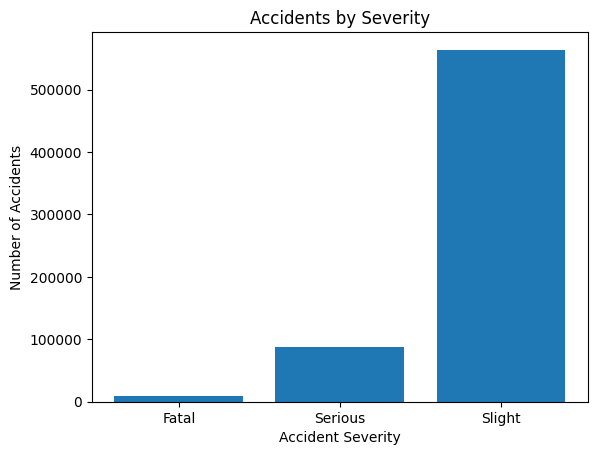

In [56]:
severity = accidents.groupby('Accident_Severity')['Index'].count()
plt.bar(severity.index, severity.values)
plt.title('Accidents by Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Number of Accidents')
plt.show()

<h2>Insight 21:</h2>
<p>The bar graph shows that Slight accidents dominate the bar chart with over 500,000 cases, indicating most incidents are minor but frequent.</p>
<hr>

<h2>Insight 22:</h2>
<p>Serious accidents, around 88,000, form a significant portion, suggesting areas for preventive measures like speed limits.</p>
<hr

<h2>Insight 23:</h2>
<p>Fatal accidents are the smallest bar, but their impact is high, emphasizing the need for targeted safety campaigns.</p>
<hr

<h2>Proportion of accidents occurring on weekends vs. weekdays</h2>

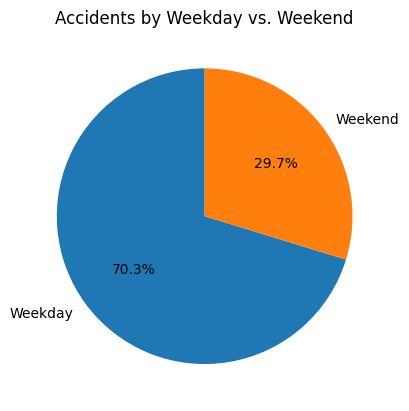

In [55]:
accidents['Is_Weekend'] = accidents['DayOfWeek'].isin([5, 6])
weekend_counts = accidents.groupby('Is_Weekend')['Index'].count()
labels = ['Weekday', 'Weekend']
plt.pie(weekend_counts.values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Accidents by Weekday vs. Weekend')
plt.show()

<h2>Insight 24: </h2>
<p>The pie chart shows weekdays account for 70.3% of accidents, driven by higher commuting and work-related traffic.</p>
<hr>

<h2>Insight 25: </h2>
<p>Weekends 29.7% have fewer accidents but may include riskier behaviors like leisure driving or alcohol-related incidents, as reflected in the smaller slice.</p>
<hr>